## This notebook will combine the census blocks file with census data

In [1]:
import geopandas as gpd
import os
import getpass
import matplotlib.pyplot as plt
import re
import pandas as pd

In [2]:
# Find working directory, saves the path while appending the notebooks file name. 
# wd is now the file path to the park-equity-atx directory.
wd = os.getcwd()
wd = wd[:wd.find('notebooks')]
censusblocks = gpd.read_file(wd+"data/cbintersection/cbi.shp")
censustables = pd.read_excel(wd+"data/censustables/ACS_17_5yr_totalpop_allcounties.xlsx")

blocks = censusblocks.copy()
tables = censustables.copy()
print(blocks['GEOID10'].head)
print(tables['Id2'].head)
tables

<bound method NDFrame.head of 0        482090109011000
1        482090109011004
2        482090109081002
3        482090109011005
4        482090109011037
              ...       
10928    484530024321003
10929    484530024311029
10930    484530024313005
10931    484530024313004
10932    484530018562036
Name: GEOID10, Length: 10933, dtype: object>
<bound method NDFrame.head of 0      482090101001
1      482090101002
2      482090102001
3      482090102002
4      482090102003
           ...     
898    484910216013
899    484910216021
900    484910216022
901    484910216031
902    484910216032
Name: Id2, Length: 903, dtype: int64>


,Id,Id2,Estimate; Total
0,1500000US482090101001,482090101001,1197
1,1500000US482090101002,482090101002,1174
2,1500000US482090102001,482090102001,870
3,1500000US482090102002,482090102002,3914
4,1500000US482090102003,482090102003,1207
...,...,...,...
898,1500000US484910216013,484910216013,2590
899,1500000US484910216021,484910216021,1956
900,1500000US484910216022,484910216022,1111
901,1500000US484910216031,484910216031,667


In [3]:
blockgroup = blocks['GEOID10'].str.slice(start=0, stop=12)
blockgroup

tables['Id2'] = tables['Id2'].astype(str)

## Merge Dataframes:
According to the [documentation](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html) we have that the geocodes are each representing block data. Census tables will have a 12 digit geoID and the census blocks data will have a 15 digit block ID. Thus, in order to merge the files a new column will be created that will do a partial match.

In [4]:
# Convert the ID2 column to string data type. This will simplify the merge 
# by allowing pandas series regex commands. We will have to convert the 
# resulting column back...maybe. The GEOID in census 

shpexcmerger = blocks.merge(tables, left_on=blockgroup, right_on='Id2', suffixes=('_blocks', '_tables'))

In [5]:
shpexcmerger

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,...,jurisdic_2,jurisdic_3,modified_f,objectid,shape_area,shape_leng,geometry,Id,Id2,Estimate; Total
0,48,209,010901,1000,482090109011000,Block 1000,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3056196.943745553 10035434.26038514,...",1500000US482090109011,482090109011,2205
1,48,209,010901,1004,482090109011004,Block 1004,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3060340.445818823 10029833.26098854,...",1500000US482090109011,482090109011,2205
2,48,209,010901,1005,482090109011005,Block 1005,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3063053.367280419 10031649.19700599,...",1500000US482090109011,482090109011,2205
3,48,209,010901,1037,482090109011037,Block 1037,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3068833.199734814 10026135.52516772,...",1500000US482090109011,482090109011,2205
4,48,209,010901,1038,482090109011038,Block 1038,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3068616.191943968 10028509.66138104,...",1500000US482090109011,482090109011,2205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10928,48,491,020411,1009,484910204111009,Block 1009,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3104721.799123466 10136634.05634473,...",1500000US484910204111,484910204111,2861
10929,48,491,020411,1000,484910204111000,Block 1000,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3111491.587660338 10139505.2244327, ...",1500000US484910204111,484910204111,2861
10930,48,491,020411,1020,484910204111020,Block 1020,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3106701.031385466 10136501.8663204, ...",1500000US484910204111,484910204111,2861
10931,48,491,020503,1044,484910205031044,Block 1044,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3106985.843647187 10146695.24721131,...",1500000US484910205031,484910205031,2642


In [6]:
#This creates a shapefile for the combination of the original census excelsheet and census blocks shapefile (note, this is for census blocks, not for census block groups. A dissolve function must be applied to this data in order for it to be used in analysis.)
#shpexcmerger.crs = {'init': 'epsg:102739'}
#shpexcmerger.to_file(wd+"data/block_groups/shpexcmerge.shp")

## Creation of the Census Block Groups shapefile 

This shapefile can be merged with any future cesus block group data for analysis purposes. The 'Id2' attribute serves as the link to merge data sets. 

In [7]:
censusblockgroups = shpexcmerger.copy()

cbgroups = censusblockgroups[['Id2', 'geometry' ]]

cbgroups


,Id2,geometry
0,482090109011,"POLYGON ((3056196.943745553 10035434.26038514,..."
1,482090109011,"POLYGON ((3060340.445818823 10029833.26098854,..."
2,482090109011,"POLYGON ((3063053.367280419 10031649.19700599,..."
3,482090109011,"POLYGON ((3068833.199734814 10026135.52516772,..."
4,482090109011,"POLYGON ((3068616.191943968 10028509.66138104,..."
...,...,...
10928,484910204111,"POLYGON ((3104721.799123466 10136634.05634473,..."
10929,484910204111,"POLYGON ((3111491.587660338 10139505.2244327, ..."
10930,484910204111,"POLYGON ((3106701.031385466 10136501.8663204, ..."
10931,484910205031,"POLYGON ((3106985.843647187 10146695.24721131,..."


In [26]:
cbgdiss =cbgroups.dissolve(by='Id2')
cbgdiss

,geometry
Id2,
482090109011,(POLYGON ((3069238.317597136 10028016.96124339...
482090109081,"POLYGON ((3093548.488136798 10008631.07120948,..."
484530001011,"POLYGON ((3111310.38010639 10089474.08471997, ..."
484530001012,"POLYGON ((3109356.370562971 10091521.99532232,..."
484530001013,"POLYGON ((3110878.498096138 10085236.13059747,..."
...,...
484910205082,"POLYGON ((3100132.260730386 10153583.00965148,..."
484910205091,"POLYGON ((3103596.356820554 10154673.60852015,..."
484910205093,"POLYGON ((3111608.114134961 10157930.24793274,..."


In [29]:
#projection
cbgdiss.crs = {'init': 'epsg:102739'}

In [30]:
#This shapefile contains the census block groups (Id2) for Austin City Limits with the appropriate projections 

cbgdiss.to_file(wd+"data/censusblockgroups/cbg.shp")

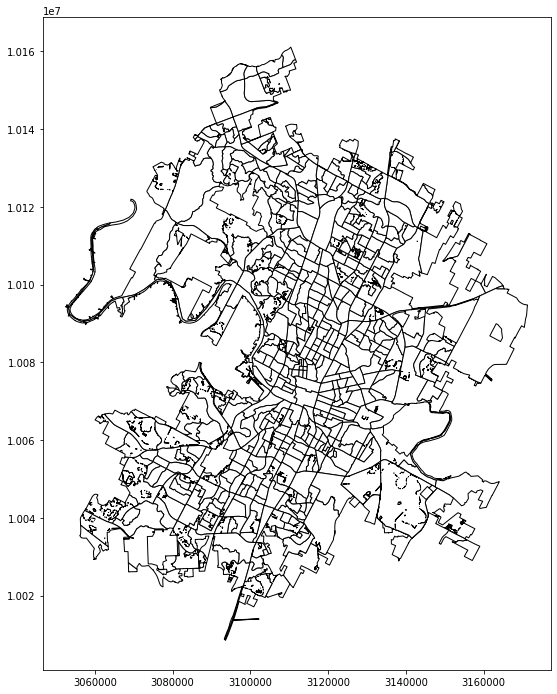

In [31]:
fig4, ax = plt.subplots(figsize=(12,12))
base = cbgdiss.plot(ax=ax, color="black", alpha=0.2)
layer = cbgdiss["geometry"].plot(ax=base, color='white', edgecolor = 'black')

### Creation of the Census Block Group shapefile with population count data included 

In [32]:
# A copy of the orginal merged dataframe was used
newmerger = shpexcmerger.copy()

In [33]:
popmerg = newmerger[['Id2', 'geometry', 'Estimate; Total' ]]

popmerg

,Id2,geometry,Estimate; Total
0,482090109011,"POLYGON ((3056196.943745553 10035434.26038514,...",2205
1,482090109011,"POLYGON ((3060340.445818823 10029833.26098854,...",2205
2,482090109011,"POLYGON ((3063053.367280419 10031649.19700599,...",2205
3,482090109011,"POLYGON ((3068833.199734814 10026135.52516772,...",2205
4,482090109011,"POLYGON ((3068616.191943968 10028509.66138104,...",2205
...,...,...,...
10916,484910204111,"POLYGON ((3104721.799123466 10136634.05634473,...",2861
10917,484910204111,"POLYGON ((3111491.587660338 10139505.2244327, ...",2861
10918,484910204111,"POLYGON ((3106701.031385466 10136501.8663204, ...",2861
10919,484910205031,"POLYGON ((3106985.843647187 10146695.24721131,...",2642


In [34]:
popdismerg = popmerg.dissolve(by='Id2')
popdismerg

,geometry,Estimate; Total
Id2,,
482090109011,(POLYGON ((3069238.317597136 10028016.96124339...,2205
482090109081,"POLYGON ((3093548.488136798 10008631.07120948,...",3774
484530001011,"POLYGON ((3111310.38010639 10089474.08471997, ...",1045
484530001012,"POLYGON ((3109356.370562971 10091521.99532232,...",1202
484530001013,"POLYGON ((3110878.498096138 10085236.13059747,...",2016
...,...,...
484910205082,"POLYGON ((3100132.260730386 10153583.00965148,...",1264
484910205091,"POLYGON ((3103596.356820554 10154673.60852015,...",2504
484910205093,"POLYGON ((3111608.114134961 10157930.24793274,...",3192


In [35]:
popdismerg.crs = {'init': 'epsg:102739'}

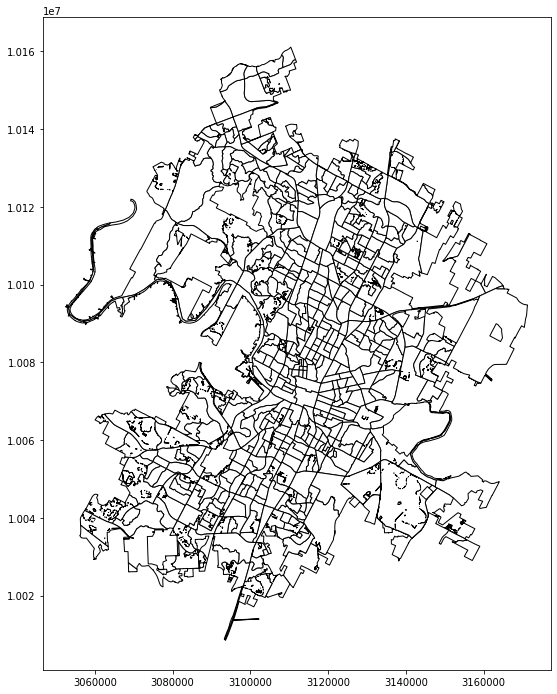

In [36]:
fig5, ax = plt.subplots(figsize=(12,12))
base = popdismerg.plot(ax=ax, color="black", alpha=0.2)
layer = popdismerg["geometry"].plot(ax=base, color='white', edgecolor = 'black')

In [37]:
#This shapefile contains the population data linked to the spatial data for census block groups within Austin City Limits, Full Jurisdiction

popdismerg.to_file(wd+"data/block_groups/cbgpop.shp")